In [339]:
# importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score, precision_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


## Task 1: Data Exploration and Visualization

In [276]:
# Load training data
train_data = pd.read_csv('train.csv')

# Load test data
test_data = pd.read_csv('test.csv')

In [277]:
# Display the first few rows of the training data
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1


In [278]:
# Display the first few rows of the test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,566,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
1,161,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
2,554,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
3,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
4,242,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q


In [279]:
train_data.shape, test_data.shape

((712, 12), (179, 11))

In [280]:
# Analyze key statistics for each feature in the training data
train_data.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,712.000000,712.000000,712,712,575.000000,712.000000,712.000000,712,712.000000,160,710,712.000000
unique,NaN,NaN,712,2,NaN,NaN,NaN,571,NaN,127,3,NaN
top,NaN,NaN,"Lam, Mr. Ali",male,NaN,NaN,NaN,1601,NaN,G6,S,NaN
freq,NaN,NaN,1,459,NaN,NaN,NaN,6,NaN,4,516,NaN
mean,444.405899,2.308989,NaN,NaN,29.807687,0.492978,0.390449,NaN,31.819826,NaN,NaN,0.383427
std,257.465527,0.833563,NaN,NaN,14.485211,1.060720,0.838134,NaN,48.059104,NaN,NaN,0.486563
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,222.750000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,439.500000,3.000000,NaN,NaN,28.500000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,667.250000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


In [40]:
# Analyze key statistics for each feature in the test data
test_data.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,179.000000,179.000000,179,179,139.000000,179.000000,179.000000,179,179.000000,44,179
unique,NaN,NaN,179,2,NaN,NaN,NaN,171,NaN,41,3
top,NaN,NaN,"Davies, Mr. Alfred J",male,NaN,NaN,NaN,19950,NaN,C23 C25 C27,S
freq,NaN,NaN,1,118,NaN,NaN,NaN,3,NaN,3,128
mean,452.340782,2.307263,NaN,NaN,29.250000,0.642458,0.346369,NaN,33.733145,NaN,NaN
std,257.532175,0.848331,NaN,NaN,14.740355,1.252228,0.664193,NaN,55.843604,NaN,NaN
min,5.000000,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,241.000000,1.500000,NaN,NaN,19.500000,0.000000,0.000000,NaN,7.987500,NaN,NaN
50%,459.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,15.245800,NaN,NaN
75%,674.500000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.797900,NaN,NaN


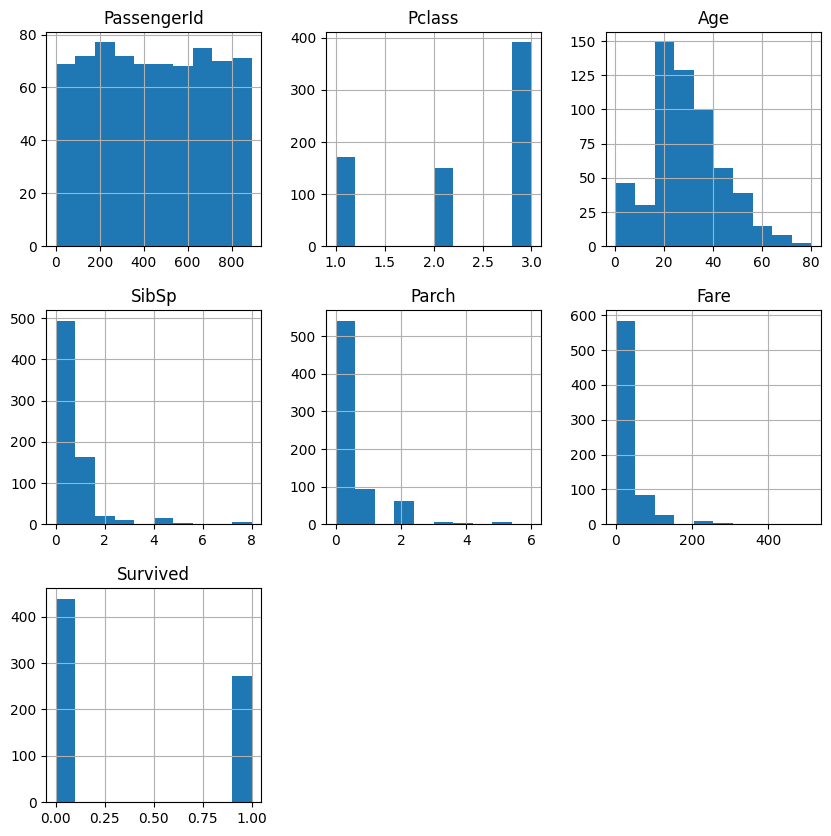

In [281]:
# Visualizing the distribution of the training data
train_data.hist(figsize=(10, 10))
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

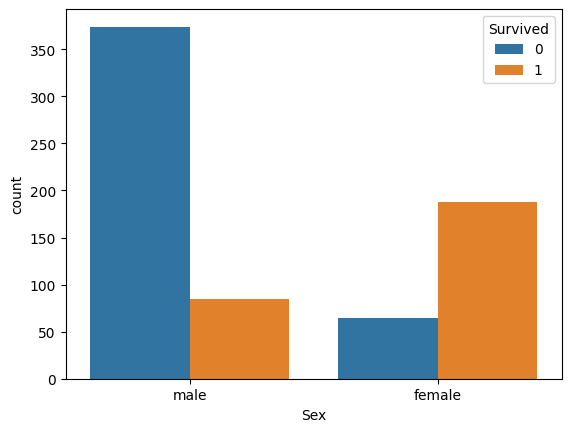

In [282]:
# Relationship between Gender and Survival
sns.countplot(x='Sex', hue='Survived', data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

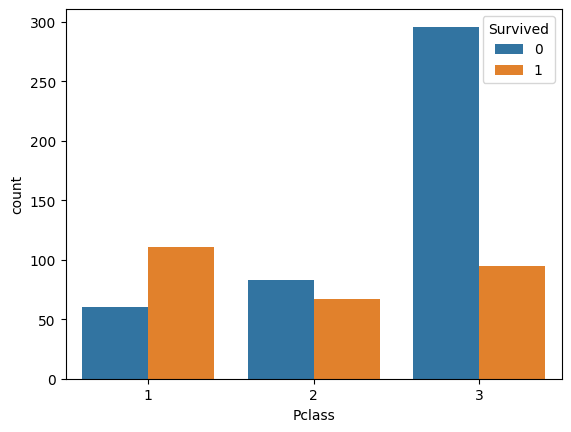

In [283]:
# Relationship between Class and Survival
sns.countplot(x='Pclass', hue='Survived', data=train_data)

<Axes: xlabel='Embarked', ylabel='count'>

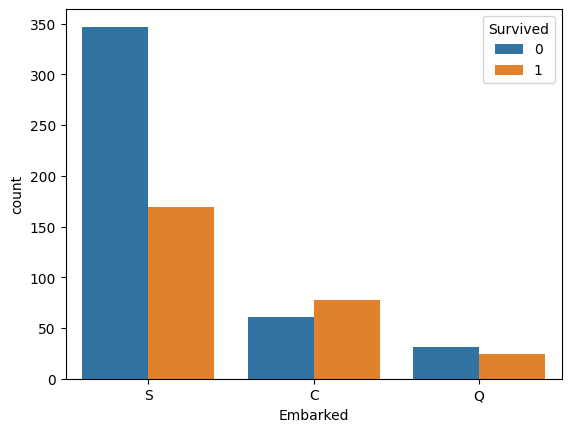

In [284]:
# Relationship between Embarked and Survival
sns.countplot(x='Embarked', hue='Survived', data=train_data)

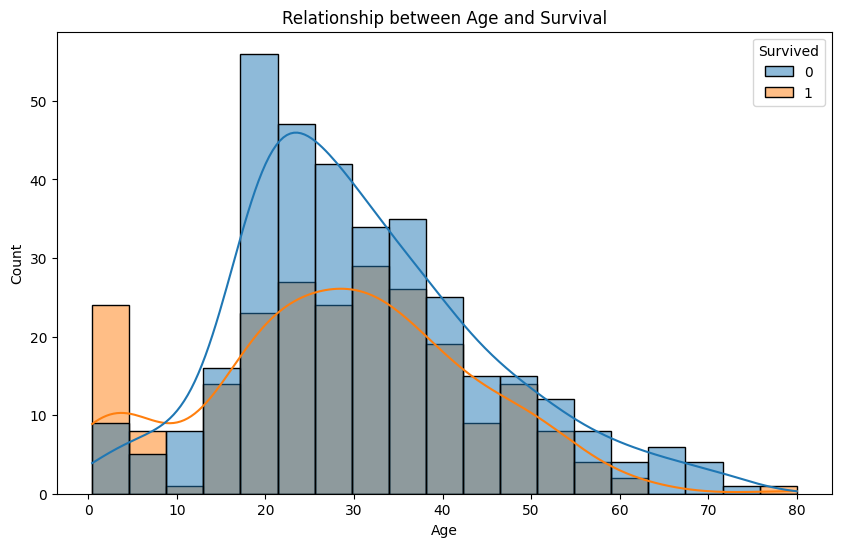

In [285]:
# Relationship between Age and Survival
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True)
plt.title('Relationship between Age and Survival')
plt.show()

## Task2: Data Cleaning and Preprocessing


Handling Missing Values

In [286]:
# Displaying information about the train and test data
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Pclass  

(None, None)

In [287]:
# Check for missing values in each column of the training data
train_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,137
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,552


In [288]:
# Check for missing values in each column of the test data
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,40
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,135


In [425]:
# Calculate the percentage of missing values for each column in the train and test data
train_missing_percentage = (train_data.isnull().sum() * 100 / len(train_data)).round(2).astype(str) + "%"
test_missing_percentage = (test_data.isnull().sum() * 100 / len(train_data)).round(2).astype(str) + "%"

# Printing results
"Train: ", train_missing_percentage, "Test: \n", test_missing_percentage

('Train: ',
 PassengerId      0.0%
 Pclass           0.0%
 Name             0.0%
 Sex              0.0%
 Age            19.24%
 SibSp            0.0%
 Parch            0.0%
 Ticket           0.0%
 Fare             0.0%
 Embarked        0.28%
 Survived         0.0%
 dtype: object,
 'Test: \n',
 PassengerId     0.0%
 Pclass          0.0%
 Name            0.0%
 Sex             0.0%
 Age            5.62%
 SibSp           0.0%
 Parch           0.0%
 Ticket          0.0%
 Fare            0.0%
 Embarked        0.0%
 dtype: object)

In [289]:
# Droping the Cabin column from both training and test data
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [290]:
# Checks and prints the number of missing values after dropping the 'Cabin' column
train_data.isnull().sum(), test_data.isnull().sum()

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age            137
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Embarked         2
 Survived         0
 dtype: int64,
 PassengerId     0
 Pclass          0
 Name            0
 Sex             0
 Age            40
 SibSp           0
 Parch           0
 Ticket          0
 Fare            0
 Embarked        0
 dtype: int64)

In [291]:
# Calculate and display the frequency of each unique value in the 'Embarked' column of the training data
train_data["Embarked"].value_counts()

,count
Embarked,
S,516
C,139
Q,55


In [60]:
# Fill missing values (NaN) in the 'Embarked' column with the value 'S' (mode)
train_data["Embarked"].fillna("S", inplace=True)

In [292]:
# creating a unified dataframe
titanic_data = pd.concat([train_data, test_data], ignore_index=True)

In [293]:
# Check for the shape of titanic data
titanic_data.shape

(891, 11)

In [294]:
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,S,1.0
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,S,0.0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,S,0.0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S,1.0
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S,1.0


In [295]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Survived     712 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


In [296]:
# Calculate the median age for each passenger class and sex combination for the train data
Age_mean = titanic_data.groupby(['Pclass','Sex'])['Age'].median()
Age_mean

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [297]:
# Filling missing 'Age' values with the median age for each passenger class and gender
titanic_data['Age'] = titanic_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [298]:
# Check for missing values in each column and calculate the total number of missing values per column
titanic_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [299]:
# Extracting Titles from Names and Adding as a Separate Column 📜
titanic_data['Title']=titanic_data['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]

In [300]:
titanic_data['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [301]:
# Replacing rare titles with 'Rare' to consolidate infrequent categories
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Standardizing common titles for consistency
titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

In [302]:
titanic_data['Title'].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Rare,23


In [303]:
# Creating a Family Column by Combining Sibling and Parent Child Column
titanic_data['Family_size']=titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [304]:
titanic_data.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title,Family_size
189,878,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,S,0.0,Mr,1
369,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,S,0.0,Mr,1
865,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,C,NaN,Miss,2
748,166,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,S,NaN,Master,3
152,481,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,S,0.0,Master,8
210,492,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,S,0.0,Mr,1
144,599,3,"Boulos, Mr. Hanna",male,25.0,0,0,2664,7.2250,C,0.0,Mr,1
183,315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,S,0.0,Mr,3
566,700,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,S,0.0,Mr,1
270,109,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,S,0.0,Mr,1


In [305]:
# Drop the columns 'Name', 'Parch', 'SibSp', and 'Ticket' from the DataFrame 'titanic_data'.
titanic_data.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)

In [306]:
titanic_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived,Title,Family_size
0,693,3,male,25.0,56.4958,S,1.0,Mr,1
1,482,2,male,30.0,0.0000,S,0.0,Mr,1
2,528,1,male,40.0,221.7792,S,0.0,Mr,1
3,856,3,female,18.0,9.3500,S,1.0,Mrs,2
4,802,2,female,31.0,26.2500,S,1.0,Mrs,3


In [307]:
# transform the numerical family size values into categorical labels ("Alone", "Small", "Large").
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

titanic_data['Family_size'] = titanic_data['Family_size'].apply(family_size)

EDA

In [308]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     889 non-null    object 
 6   Survived     712 non-null    float64
 7   Title        891 non-null    object 
 8   Family_size  891 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 62.8+ KB


In [309]:
# Change "Age" column data type from float to integer
titanic_data['Age'] = titanic_data['Age'].astype(int)

In [312]:
# Spliting the data back into train and test sets
train = titanic_data[titanic_data['Survived'].notna()]
test = titanic_data[titanic_data['Survived'].isna()]

# Reset the index for both dataframes
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [313]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived,Title,Family_size
0,566,3,male,24,24.1500,S,NaN,Mr,Small
1,161,3,male,44,16.1000,S,NaN,Mr,Small
2,554,3,male,22,7.2250,C,NaN,Mr,Alone
3,861,3,male,41,14.1083,S,NaN,Mr,Small
4,242,3,female,21,15.5000,Q,NaN,Miss,Small


In [314]:
test.drop(columns=['Survived'],inplace=True)

In [315]:
train['Survived'] = train['Survived'].astype('int64')

In [316]:
train.shape,test.shape

((712, 9), (179, 8))

In [318]:
le = LabelEncoder()

In [320]:
# Encoding object data types in train_data
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])

In [324]:
# Splitting the train data to features and target
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']

In [325]:
# Instantiate the standard scaler
scaler = StandardScaler()

In [326]:
# Applying Standardization to the features
X_train = scaler.fit_transform(X_train)

In [408]:
# Splitting the train data into train and validation sets
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

## Task 3: Feature Engineering

In [310]:
### Finding Survival Correlation with Every Other column
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    data=titanic_data.groupby(i)['Survived'].mean().reset_index()
    print(data)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.561151
1        Q  0.436364
2        S  0.327519
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.649123
1       2  0.446667
2       3  0.242967
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.743083
1    male  0.185185
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.548387
1    Miss  0.708333
2      Mr  0.152913
3     Mrs  0.785047
4    Rare  0.388889
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.299539
1       Large  0.160000
2       Small  0.592105
---------- 



In [342]:
# Pearson correlation matrix on training data(features)
corr = train.corr()

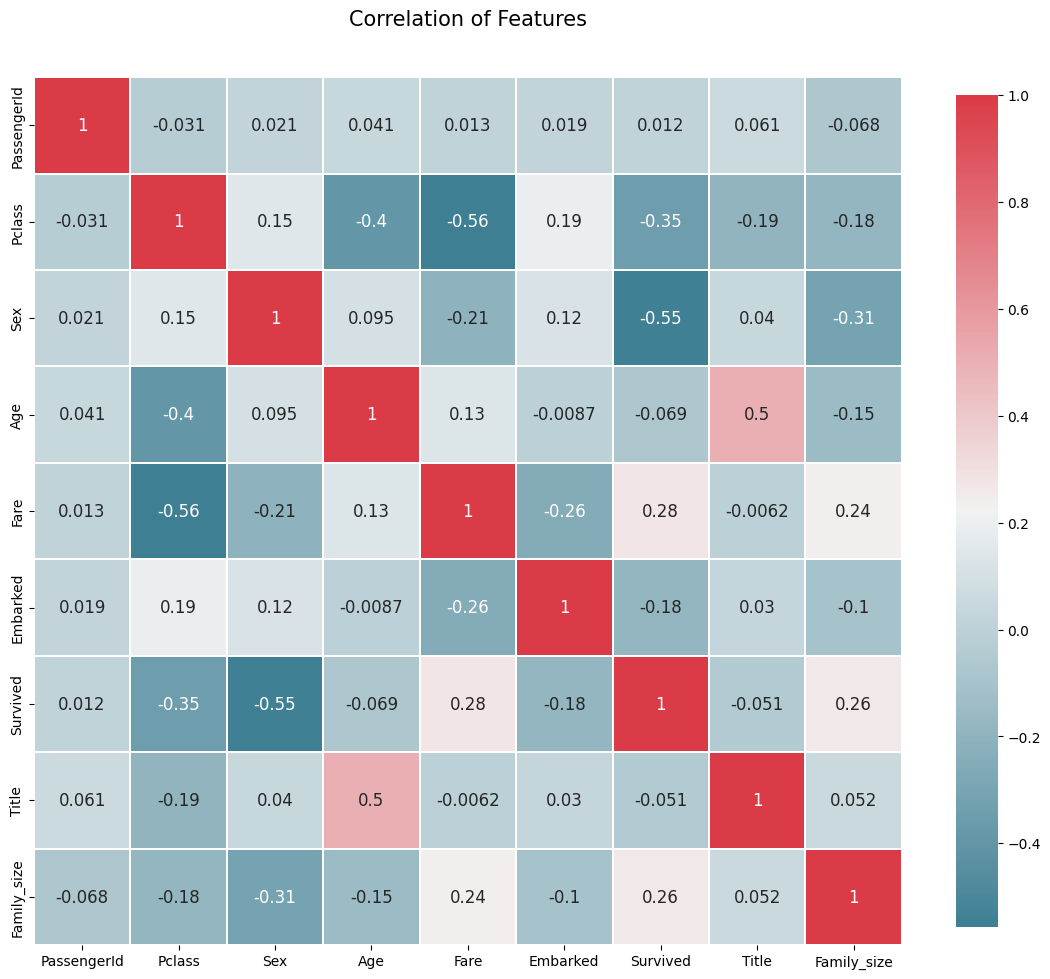

In [343]:
# function to create heatmap for the 'titanic_data' DataFrame
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(numeric_only=True),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title('Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

### Task 4: Model Selection and Training

In [409]:
# Define categorical and numerical features
categorical_features = ['Embarked', 'Sex', 'Title', 'Family_size']
numerical_features = ['Pclass', 'Age', 'Fare']

# Create pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Create the final pipeline with the preprocessor and an estimator
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    # ('randomforest', RandomForestClassifier(random_state=42)),
    # # You can swap out 'classifier' with other estimators like:
    # ('svc', SVC()),
    # ('LogisticRegression', LogisticRegression()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    # ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    # ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    # ('SGDClassifier', SGDClassifier(loss="hinge", penalty="l2", max_iter=5)),
    # ('GaussianNB', GaussianNB())
])


In [410]:
# Convert X_train back to a Pandas DataFrame with original column names
X_train = pd.DataFrame(X_train, columns=train.drop(columns=['Survived']).columns)

In [411]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Embarked', 'Sex', 'Title',
                                                   'Family_size'])])),
                ('KNeighborsClassifier', KNeighborsClassifier())])

In [412]:
X_test = pd.DataFrame(X_test, columns=train.drop(columns=['Survived']).columns)


In [413]:
# Evaluate the pipeline on the test data
pipeline.score(X_test, y_test)

0.8241758241758241

In [414]:
# Use the trained pipeline to predict on the X_test data
y_pred = pipeline.predict(X_test)

In [415]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0])

In [416]:
# Printing the confusion matrix
conf = confusion_matrix(y_test, y_pred)
conf

array([[49,  7],
       [ 9, 26]])

In [ ]:
# Extracting TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf.ravel()

In [417]:
# Performing cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.78082192 0.73972603 0.69863014 0.79452055 0.80555556]
Mean cross-validation score: 0.7638508371385084
Standard deviation of cross-validation scores: 0.03950614750062317


In [419]:
# classification report to evaluate model performance
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        56
           1       0.79      0.74      0.76        35

    accuracy                           0.82        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.82      0.82        91



In [365]:
# Evaluate the model's performance using various metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred ))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.8245614035087719
Precision:  0.7
Recall:  0.7777777777777778
F1 Score:  0.7368421052631579
ROC AUC Score:  0.811965811965812


## Task 5: Model Optimization

In [370]:
# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8]
}

# Update the pipeline with DecisionTreeClassifier
pipeline.set_params(classifier=DecisionTreeClassifier(random_state=42))

# Instantiate the GridSearchCV object
grid_search_dt = GridSearchCV(pipeline, param_grid_dt, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for DecisionTreeClassifier:", best_params_dt)
print("Best Cross-Validation Score for DecisionTreeClassifier:", best_score_dt)

Best Parameters for DecisionTreeClassifier: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
Best Cross-Validation Score for DecisionTreeClassifier: 0.8065934065934066


In [374]:
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Update the pipeline with RandomForestClassifier
pipeline.set_params(classifier=RandomForestClassifier(random_state=42))

# Instantiate the GridSearchCV object
grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for RandomForestClassifier:", best_params_rf)
print("Best Cross-Validation Score for RandomForestClassifier:", best_score_rf)

Best Parameters for RandomForestClassifier: {'classifier__max_depth': 4, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Cross-Validation Score for RandomForestClassifier: 0.8241758241758241


In [376]:
# Define the parameter grid for GaussianNB
param_grid_gnb = {
    'classifier__var_smoothing': np.logspace(0, -9, num=100)
}

# Update the pipeline with GaussianNB
pipeline.set_params(classifier=GaussianNB())

# Instantiate the GridSearchCV object
grid_search_gnb = GridSearchCV(pipeline, param_grid_gnb, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_gnb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_gnb = grid_search_gnb.best_params_
best_score_gnb = grid_search_gnb.best_score_

print("Best Parameters for GaussianNB:", best_params_gnb)
print("Best Cross-Validation Score for GaussianNB:", best_score_gnb)

Best Parameters for GaussianNB: {'classifier__var_smoothing': 0.0533669923120631}
Best Cross-Validation Score for GaussianNB: 0.789010989010989


In [381]:
# Update the pipeline with RandomForestClassifier before setting parameters
pipeline.set_params(classifier=RandomForestClassifier(random_state=42))

# Update the pipeline with the best parameters found during GridSearchCV
best_rf_params = grid_search_rf.best_params_
pipeline.set_params(**best_rf_params)


# Fit the updated pipeline to the entire training data
pipeline.fit(X_train, y_train)

#Further evaluations
y_pred = pipeline.predict(X_test)

# Printing the confusion matrix
conf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf)

# Generate a classification report to evaluate the model's performance per class
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print("Accuracy after tuning: ", accuracy_score(y_test, y_pred))
print("Precision after tuning: ", precision_score(y_test, y_pred))
print("Recall after tuning: ", recall_score(y_test, y_pred ))
print("F1 Score after tuning: ", f1_score(y_test, y_pred))
print("ROC AUC Score after tuning: ", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[68 10]
 [ 6 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        78
           1       0.75      0.83      0.79        36

    accuracy                           0.86       114
   macro avg       0.83      0.85      0.84       114
weighted avg       0.87      0.86      0.86       114

Accuracy after tuning:  0.8596491228070176
Precision after tuning:  0.75
Recall after tuning:  0.8333333333333334
F1 Score after tuning:  0.7894736842105263
ROC AUC Score after tuning:  0.8525641025641026


## Task 6: Testing and Submission

In [382]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
0,566,3,male,24,24.1500,S,Mr,Small
1,161,3,male,44,16.1000,S,Mr,Small
2,554,3,male,22,7.2250,C,Mr,Alone
3,861,3,male,41,14.1083,S,Mr,Small
4,242,3,female,21,15.5000,Q,Miss,Small


In [422]:
# Creating a LabelEncoder object to convert categorical data to numerical data
le = LabelEncoder()

In [420]:
# Encoding object data types in the test data
for col in test.select_dtypes('object'):
    test[col] = le.fit_transform(test[col])

In [421]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
0,566,3,1,24,24.1500,2,2,2
1,161,3,1,44,16.1000,2,2,2
2,554,3,1,22,7.2250,0,2,0
3,861,3,1,41,14.1083,2,2,2
4,242,3,0,21,15.5000,1,1,2


In [423]:
# Apply the same transformations to the test data
X_test = scaler.transform(test)

In [387]:
# Convert the test data to a Pandas DataFrame
X_test = pd.DataFrame(X_test, columns=test.columns)

In [388]:
# Make predictions on the test data
test_predicts = pipeline.predict(X_test)

In [389]:
test_predicts

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [394]:
# Create a submission DataFrame
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predicts})

In [424]:
 # Save predictions to a CSV file
submission.to_csv('Michael_submission.csv', index=False)